# Sprint7 クラスタリング

# ライブラリのimport

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
#《雛形》

class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

# スクラッチクラスの実装

In [3]:
class ScratchKMeans():
    """KMeansクラスタリングのスクラッチ
    """
    def __init__(self, n_clusters=2,n_init=20,n_iter=100,verbose=False):
        """
        Scratch implementation of K-means

        Parameters
        ----------
        n_clusters : クラスタ数
        n_init : 何回初期化するか
        max_iter : 各初期化毎に何回学習させるか
        verbose : 学習状況を出力するか否か
        """
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        # SSE（誤差）を小さくする方向に学習（更新）させていくため、初期値は大きいものを用意しておく
        self.best_sse = 10**20
        
    def _update_myu(self,X):
        """中心点の更新
        Parameters
        ----------
        X : 説明変数
        """
        self.pre_myu = self.myu
        # クラスタ数でループ
        for j in range(self.n_clusters):
            # ループ中のクラスタに該当する説明変数の値の平均値を新しい中心点とする
            self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)
        
    def _update_cluster(self,X):
        """クラスタの更新
        Parameters
        ----------
        X : 説明変数
        """
        # データ数でループ
        for i in range(len(X)):
            # 比較のための初期値
            dist_m = 10**20
            # クラスタ数でループ
            for j in range(self.n_clusters):
                # 該当クラスタの中心点との距離を計算
                dist = np.sqrt(np.sum((X[i,:-1])-self.myu[j]**2))
                # 前回保存した（あるいは初期値）より距離が小さければ、そちらのクラスタを採用
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j
                    
    def calc_sse(self,X):
        """SSEの計算
        Parameters
        ----------
        X : 説明変数
        """
        # SSEの計算
        sse = 0
        # データ数でループ
        for i in range(len(X)):
            # クラスタ数でループ
            for j in range(self.n_clusters):
                # 末尾のクラスタを判定し、該当クラスタならsseに加算
                if j == X[i,-1]:
                    # ベクトルの距離（ノルム）計算＊末尾のクラスタを除いた数値を使用している点に注意
                    sse += np.sum((X[i,:-1]-self.myu[j])**2)
        # sseが改善していれば、更新
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
        
    def fit(self, X):
        """学習
        Parameters
        ----------
        X : 説明変数
        """
        # 初期化回数分ループ
        for i in range(self.n_init):
            
            # データXからクラスタ数分の初期値をランダムにとってくる(各クラスタの初期の中心点)
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
        
            # Xベクトルにクラスタ列を追加（クラスタは0で初期化）
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            
            # 最大学習回数分ループ
            for j in range(self.n_iter):
                # SSEを更新
                self.calc_sse(X_cluster)

                # クラスタ更新
                self._update_cluster(X_cluster)
                
                # クラスタの中心点の更新
                self._update_myu(X_cluster)
                
                # 学習状況の出力（グラフ）
                if self.verbose:
                    print("初期化：%s　学習回数：%s　最善のSSE：%s"%(i,j,self.best_sse))
                
            
    def predict(self, X):
        """予測
        Parameters
        ----------
        X : 説明変数
        """
        # 予測値の初期化
        y_pred = np.zeros(len(X))
        # 処理の流れ自体は、_reclustering関数と同様
        # データ数でループ
        for i in range(len(X)):
            # 比較のための初期値
            dist_m = 10**20
            # クラスタ数でループ
            for j in range(self.record_cluster):
                # 該当クラスタの中心点との距離を計算
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                # 前回保存した（あるいは初期値）より距離が小さければ、そちらのクラスタを採用
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

# 事前準備：データ作成

In [4]:
# Simple Data Set 3
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

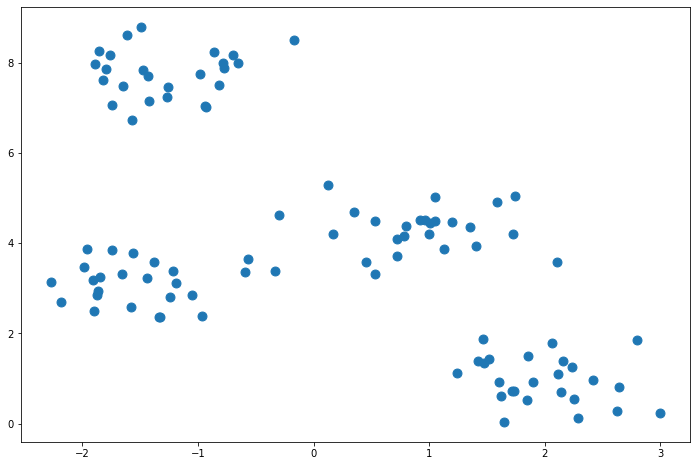

In [5]:
# Data Distribution Visualization
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80);

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

print(X_train.shape)
print(X_valid.shape)

(80, 2)
(20, 2)


クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


《シンプルデータセット3》


1
2
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

学習
K-meansの学習に必要な要素を順番に作成していきます。


## 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。


スクラッチコード86行目

`self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]`

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。


$SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2$  

$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : $n$番目のデータ点


$\mu_k$ : $k$番目の中心点


$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0


クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


中心点 $\mu_k$ を固定した上で $SSE$ を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。
クラスタの割り当て $r_{nk}$ を固定した上で $SSE$ を最小化する 中心点 $\mu_k$ を選ぶ。

最初の中心点 $\mu_k$ は問題1で作成した初期値です。


順番に見ていきます。



53行目：`def calc_sse(self,X)`

## 【問題3】クラスタへの割り当て
すべてのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。

$
∥
q
−
p
∥
=
√
(
q
−
p
)
⋅
(
q
−
p
)
$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 $\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

34行目：`def _update_cluster(self,X)`

## 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられるすべてのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

22行目：`def _update_myu(self,X)`

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

83行目：`for i in range(self.n_init):`

93行目：`for j in range(self.n_iter):`

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。

In [7]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=True)
clf.fit(X_train)

初期化：0　学習回数：0　最善のSSE：1113.6194644046159
初期化：0　学習回数：1　最善のSSE：730.0755023500262
初期化：0　学習回数：2　最善のSSE：730.0755023500262
初期化：0　学習回数：3　最善のSSE：730.0755023500262
初期化：0　学習回数：4　最善のSSE：730.0755023500262
初期化：0　学習回数：5　最善のSSE：730.0755023500262
初期化：0　学習回数：6　最善のSSE：730.0755023500262
初期化：0　学習回数：7　最善のSSE：730.0755023500262
初期化：0　学習回数：8　最善のSSE：730.0755023500262


<ipython-input-3-a25dab1a3650>:47: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt(np.sum((X[i,:-1])-self.myu[j]**2))
<ipython-input-3-a25dab1a3650>:49: RuntimeWarning: invalid value encountered in less
  if dist < dist_m:
C:\Users\ren30\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ren30\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


初期化：0　学習回数：9　最善のSSE：730.0755023500262
初期化：0　学習回数：10　最善のSSE：730.0755023500262
初期化：0　学習回数：11　最善のSSE：730.0755023500262
初期化：0　学習回数：12　最善のSSE：730.0755023500262
初期化：0　学習回数：13　最善のSSE：730.0755023500262
初期化：0　学習回数：14　最善のSSE：730.0755023500262
初期化：0　学習回数：15　最善のSSE：730.0755023500262
初期化：0　学習回数：16　最善のSSE：730.0755023500262
初期化：0　学習回数：17　最善のSSE：730.0755023500262
初期化：0　学習回数：18　最善のSSE：730.0755023500262
初期化：0　学習回数：19　最善のSSE：730.0755023500262
初期化：0　学習回数：20　最善のSSE：730.0755023500262
初期化：0　学習回数：21　最善のSSE：730.0755023500262
初期化：0　学習回数：22　最善のSSE：730.0755023500262
初期化：0　学習回数：23　最善のSSE：730.0755023500262
初期化：0　学習回数：24　最善のSSE：730.0755023500262
初期化：0　学習回数：25　最善のSSE：730.0755023500262
初期化：0　学習回数：26　最善のSSE：730.0755023500262
初期化：0　学習回数：27　最善のSSE：730.0755023500262
初期化：0　学習回数：28　最善のSSE：730.0755023500262
初期化：0　学習回数：29　最善のSSE：730.0755023500262
初期化：0　学習回数：30　最善のSSE：730.0755023500262
初期化：0　学習回数：31　最善のSSE：730.0755023500262
初期化：0　学習回数：32　最善のSSE：730.0755023500262
初期化：0　学習回数：33　最善のSSE：730.0755023500262
初期化：0　学習回数：34　最善のSSE：730.0

初期化：2　学習回数：21　最善のSSE：466.74366876257875
初期化：2　学習回数：22　最善のSSE：466.74366876257875
初期化：2　学習回数：23　最善のSSE：466.74366876257875
初期化：2　学習回数：24　最善のSSE：466.74366876257875
初期化：2　学習回数：25　最善のSSE：466.74366876257875
初期化：2　学習回数：26　最善のSSE：466.74366876257875
初期化：2　学習回数：27　最善のSSE：466.74366876257875
初期化：2　学習回数：28　最善のSSE：466.74366876257875
初期化：2　学習回数：29　最善のSSE：466.74366876257875
初期化：2　学習回数：30　最善のSSE：466.74366876257875
初期化：2　学習回数：31　最善のSSE：466.74366876257875
初期化：2　学習回数：32　最善のSSE：466.74366876257875
初期化：2　学習回数：33　最善のSSE：466.74366876257875
初期化：2　学習回数：34　最善のSSE：466.74366876257875
初期化：2　学習回数：35　最善のSSE：466.74366876257875
初期化：2　学習回数：36　最善のSSE：466.74366876257875
初期化：2　学習回数：37　最善のSSE：466.74366876257875
初期化：2　学習回数：38　最善のSSE：466.74366876257875
初期化：2　学習回数：39　最善のSSE：466.74366876257875
初期化：2　学習回数：40　最善のSSE：466.74366876257875
初期化：2　学習回数：41　最善のSSE：466.74366876257875
初期化：2　学習回数：42　最善のSSE：466.74366876257875
初期化：2　学習回数：43　最善のSSE：466.74366876257875
初期化：2　学習回数：44　最善のSSE：466.74366876257875
初期化：2　学習回数：45　最善のSSE：466.74366876257875


初期化：4　学習回数：33　最善のSSE：466.74366876257875
初期化：4　学習回数：34　最善のSSE：466.74366876257875
初期化：4　学習回数：35　最善のSSE：466.74366876257875
初期化：4　学習回数：36　最善のSSE：466.74366876257875
初期化：4　学習回数：37　最善のSSE：466.74366876257875
初期化：4　学習回数：38　最善のSSE：466.74366876257875
初期化：4　学習回数：39　最善のSSE：466.74366876257875
初期化：4　学習回数：40　最善のSSE：466.74366876257875
初期化：4　学習回数：41　最善のSSE：466.74366876257875
初期化：4　学習回数：42　最善のSSE：466.74366876257875
初期化：4　学習回数：43　最善のSSE：466.74366876257875
初期化：4　学習回数：44　最善のSSE：466.74366876257875
初期化：4　学習回数：45　最善のSSE：466.74366876257875
初期化：4　学習回数：46　最善のSSE：466.74366876257875
初期化：4　学習回数：47　最善のSSE：466.74366876257875
初期化：4　学習回数：48　最善のSSE：466.74366876257875
初期化：4　学習回数：49　最善のSSE：466.74366876257875
初期化：4　学習回数：50　最善のSSE：466.74366876257875
初期化：4　学習回数：51　最善のSSE：466.74366876257875
初期化：4　学習回数：52　最善のSSE：466.74366876257875
初期化：4　学習回数：53　最善のSSE：466.74366876257875
初期化：4　学習回数：54　最善のSSE：466.74366876257875
初期化：4　学習回数：55　最善のSSE：466.74366876257875
初期化：4　学習回数：56　最善のSSE：466.74366876257875
初期化：4　学習回数：57　最善のSSE：466.74366876257875


## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。


データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。


In [8]:
pred = clf.predict(X_valid)
pred

array([3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 0., 0., 0.,
       3., 0., 3.])

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

<ipython-input-3-a25dab1a3650>:47: RuntimeWarning: invalid value encountered in sqrt
  dist = np.sqrt(np.sum((X[i,:-1])-self.myu[j]**2))
<ipython-input-3-a25dab1a3650>:49: RuntimeWarning: invalid value encountered in less
  if dist < dist_m:


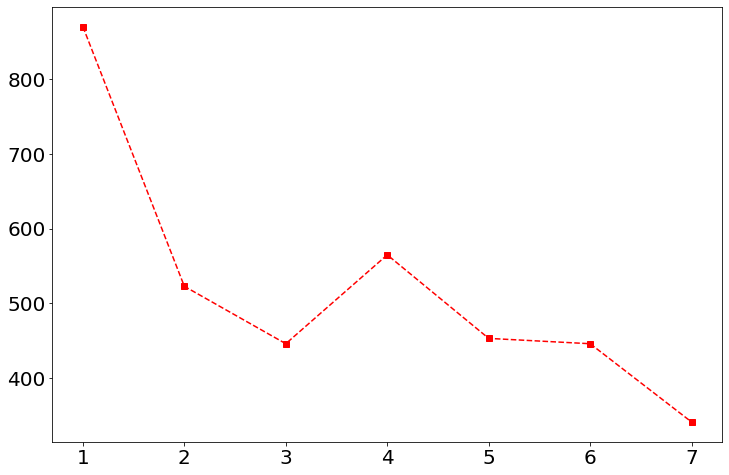

In [9]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse

fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

# 事前準備：データ作成＆PCA

In [10]:
# データ読み込み
data = pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


No handles with labels found to put in legend.


[0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


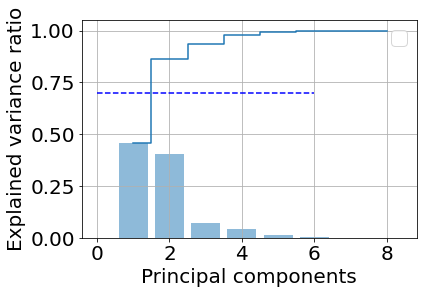

In [11]:
# 主成分分析結果の可視化
# サンプルコードの実行
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,9), var_exp, alpha=0.5, align='center')
plt.step(range(1,9), cum_var_exp, where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 問題10,11,12に関しては、考察系のため回答例の紹介は省略します。


**卸売業者にとって有益な情報**を求めたいという目標があるため、それを前提に分析を行っていきます。

**卸売業者にとって有益な情報**を次のように設定する

顧客をいくつかのクラスターに分け、そのクラスターの特性に合ったサービスを創出していきたい

こういうビジネス的な施策を考える上での分析では、エルボー法やシルエット図のようないわゆる学問的なクラスタ数の決定方法より、ビジネスとしての実現可能性の方が重視されることが多い。


+ 任意のクラスタ数を決定(8つのクラスタに分けたところで、施策やサービスを8種類用意できると思わない)
+ クラスターに分ける
+ 各クラスターの傾向を見る
+ 施策を考える
+ 結果論的に施策が似ているクラスタは合体させる